<a href="https://colab.research.google.com/github/ArtsemiRyabu/NN_ITP31_2/blob/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_img_4096p(path):
    img = Image.open(path)
    img = img.resize((30, 30))
    plt.subplot(5, 5, i)
    plt.imshow(img, cmap = "gray")
    img = img.convert('1')
    new_img = np.array(img, np.float)
    new_img = new_img.reshape([-1, 900])
    return new_img 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


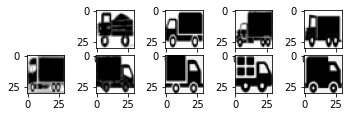

In [ ]:
img_x_train = []
img_y_train = []
path = '/content/drive/MyDrive/Colab Notebooks/Truck/'
for i in range(2, 11):
  img_x_train.append(get_img_4096p(path + str(i) +'.png')[0])
  img_y_train.append(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


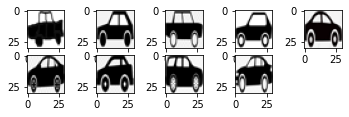

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Auto/'
for i in range(1, 10):
  img_x_train.append(get_img_4096p(path + str(i) +'.png')[0])
  img_y_train.append(0)


In [ ]:
print(img_x_train[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
def step_func(x):
  if(x > 0):
    return 1
  else:
    return 0

class Neuron:
  def __init__(self, countWeights):
    self.weights = []
    for i in range(countWeights):
      self.weights.append(random.randint(-3, 3))
    self.bias = random.randint(-3, 3)

  def neuron_sum(self, x):
    sum = self.bias
    for i in range(len(self.weights)):
      sum = sum + self.weights[i] * x[i]
    return sum


  def feed(self, x):
    y = step_func(self.neuron_sum(x))
    return y

class Network:
  def __init__(self):
    self.LayerNeurons1 = []
    self.LayerNeurons2 = []
    self.LayerNeuronsPenult = []
    for i in range(32):
      n = Neuron(900)
      self.LayerNeurons1.append(n)
    for i in range(27):
      n = Neuron(len(self.LayerNeurons1))
      self.LayerNeurons2.append(n)
    for i in range(19):
      n = Neuron(len(self.LayerNeurons2))
      self.LayerNeuronsPenult.append(n)
    self.LayerNeuronFinal = Neuron(len(self.LayerNeuronsPenult))

  def predict(self, data):
    y_pred = []
    for x in data:
      h1 = []
      h2 = []
      h3 = []
      for n in self.LayerNeurons1:
        h1.append(n.feed(x))
      for n in self.LayerNeurons2:
        h2.append(n.feed(h1))
      for n in self.LayerNeuronsPenult:
        h3.append(n.feed(h2))
      y_pred.append(self.LayerNeuronFinal.feed(h3))
    return y_pred

  def trainHebb(self, data, y_trues):
    epochs = 100
    epoch_arr = []
    accs = []
    # Цикл по эпохам
    for epoch in range(epochs):
      # Цикл по данным
      for x, y_true in zip(data, y_trues):
        # Вычисление воходов нейронов первого слоя
        h1 = []
        h2 = []
        h3 = []
        for n in self.LayerNeurons1:
          h1.append(n.feed(x))
        for n in self.LayerNeurons2:
          h2.append(n.feed(h1))
        for n in self.LayerNeuronsPenult:
          h3.append(n.feed(h2))
        out = self.LayerNeuronFinal.feed(h3)
        # Сравнение с правильным ответом и коррекция весов
        if(out > y_true):
            for n in self.LayerNeurons1:
              for i in range(len(x)):
                if(x[i] == 1):
                  n.weights[i] -= 0.1
              n.bias -= 0.1
            for n in self.LayerNeurons2:
              for i in range(len(h1)):
                if(h1[i] == 1):
                  n.weights[i] -= 0.1
              n.bias -= 0.1
            for n in self.LayerNeuronsPenult:
              for i in range(len(h2)):
                if(h2[i] == 1):
                  n.weights[i] -= 0.1
              n.bias -= 0.1
            for i in range(len(h3)):
              if(h3[i] == 1):
                n.weights[i] -= 0.1
            self.LayerNeuronFinal.bias -= 0.1
        elif(out < y_true):
            for n in self.LayerNeurons1:
              for i in range(len(x)):
                if(x[i] == 1):
                  n.weights[i] += 0.1
              n.bias += 0.1
            for n in self.LayerNeurons2:
              for i in range(len(h1)):
                if(h1[i] == 1):
                  n.weights[i] += 0.1
              n.bias += 0.1
            for n in self.LayerNeuronsPenult:
              for i in range(len(h2)):
                if(h2[i] == 1):
                  n.weights[i] += 0.1
              n.bias += 0.1
            for i in range(len(h3)):
              if(h3[i] == 1):
                n.weights[i] += 0.1
            self.LayerNeuronFinal.bias += 0.1
      y_preds = self.predict(data)
      acc = accuracy_score(y_trues, y_preds)
      epoch_arr.append(epoch)
      accs.append(acc)
      if epoch % 2 == 1 or acc > 0.98:
        print("Epoch %d acc: %.3f" % (epoch, acc))
      if acc > 0.98:
        break
    return epoch_arr, accs


In [ ]:
network = Network()

epochs, accuracies = network.trainHebb(img_x_train, img_y_train)

Epoch 1 acc: 0.556
Epoch 3 acc: 0.667
Epoch 5 acc: 0.944
Epoch 7 acc: 0.944
Epoch 9 acc: 0.889
Epoch 11 acc: 1.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


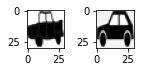

In [ ]:
x_test_full = []
x_test = []
y_test = []
path = '/content/drive/MyDrive/Colab Notebooks/Auto/'
for i in range(1, 3):
  x_test_full.append(get_img_4096p(path + str(i) +'.png')[0])
  x_test.append(get_img_4096p(path + str(i) +'.png')[0])
  y_test.append(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


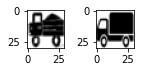

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Truck/'
for i in range(2, 4):
  x_test_full.append(get_img_4096p(path + str(i) +'.png')[0])
  x_test.append(get_img_4096p(path + str(i) +'.png')[0])
  y_test.append(0)

acc:0.5


IndexError: ignored

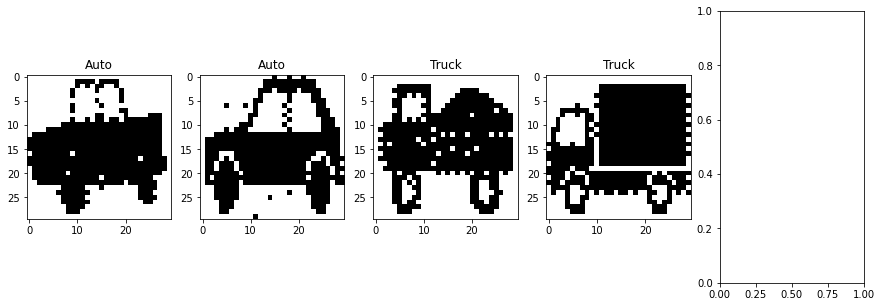

In [ ]:
y_pred = network.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("acc:" + str(acc))
ress = ['Auto', 'Truck']
plt.figure(figsize=(15,5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.title(ress[y_pred[i]])
  img = np.reshape((x_test_full[i]), [30, 30])
  plt.imshow(img, cmap="gray")